**IMPORTS**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from prophet.plot import add_changepoints_to_plot, plot_plotly, plot_components_plotly
from prophet import Prophet
from CreateCsv import get_df, getpartialcsv

**API**

Note that every graph has been plotted starting from the "PriceUSD" column of the "btc.csv" file 

Creation of data frame

In [2]:
df = pd.read_csv('btc.csv')
df = df[['time','PriceUSD']]
df.columns = ['ds', 'y']

df.tail()

,ds,y
4896,2022-05-31,31831.409525
4897,2022-06-01,29825.922199
4898,2022-06-02,30504.268000
4899,2022-06-03,29662.670971
4900,2022-06-04,NaN


We fit the model by instantiating a new Prophet object

In [3]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\Users\maxba\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Creates a new data frame called "future" and it creates a column named "ds" containing all the dates of the previous df plus one more month

In [4]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
5261,2023-05-31
5262,2023-06-01
5263,2023-06-02
5264,2023-06-03
5265,2023-06-04


Cretaion of columns "yhat", "yhat_lower", "yhat_upper" in a new data frame called "forecast" for the predicted values, components and uncertainty intervals 

In [5]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

c:\Users\maxba\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\maxba\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
5261,2023-05-31,72431.661444,65474.550606,80353.806162
5262,2023-06-01,72529.871509,65895.265835,79209.259685
5263,2023-06-02,72679.762869,65575.096717,80090.727512
5264,2023-06-03,72893.188594,65082.221470,80445.020522
5265,2023-06-04,73054.943047,65976.428443,80035.629591


Plotting predictions

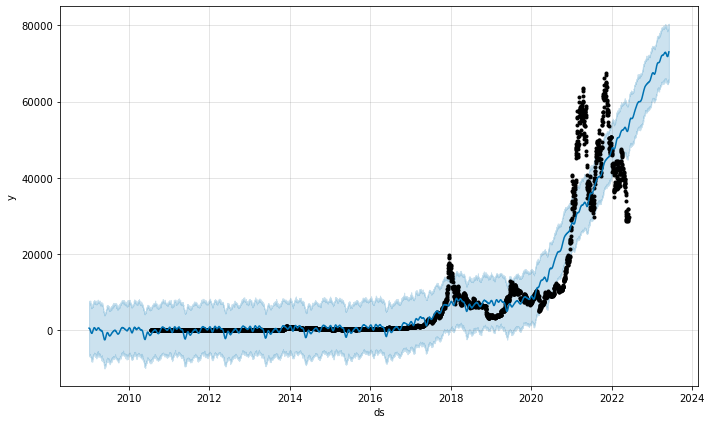

In [6]:
fig1 = m.plot(forecast)

Plotting components by specific time

c:\Users\maxba\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\maxba\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


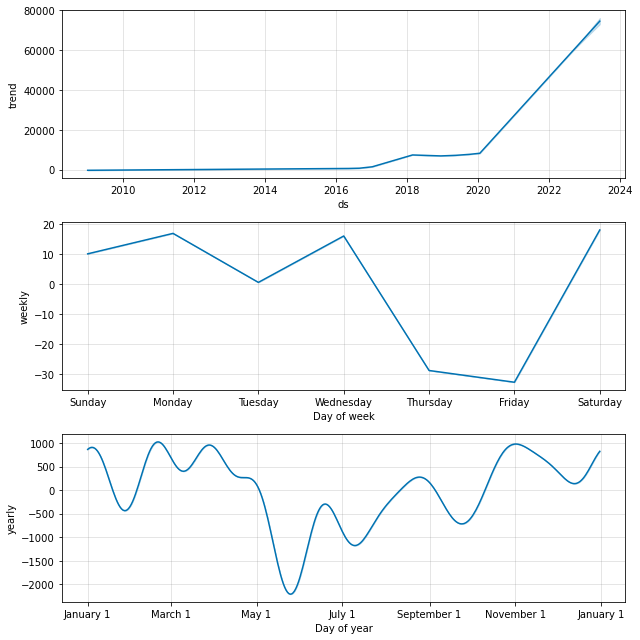

In [7]:
fig2 = m.plot_components(forecast)

Same plots as before on an interactive figure

In [8]:
plot_plotly(m, forecast)

components plot on an interactif figure

In [9]:
plot_components_plotly(m, forecast)

c:\Users\maxba\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\maxba\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



**CHANGE POINTS**

Plot with change points

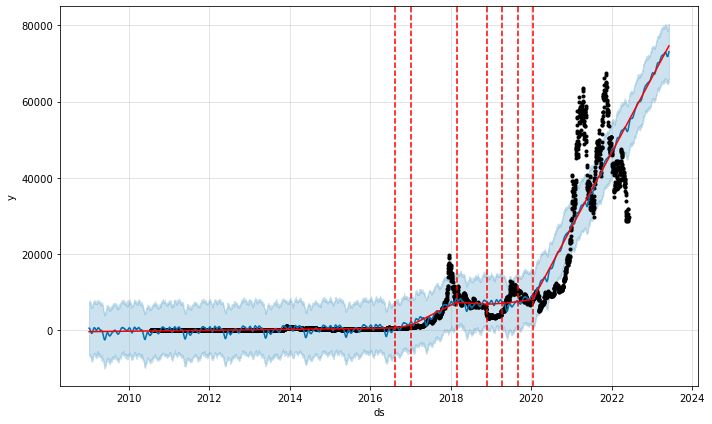

In [10]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

Setting a parametre to avoid any problem of overlifting and of underlifting

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\Users\maxba\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\maxba\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\maxba\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



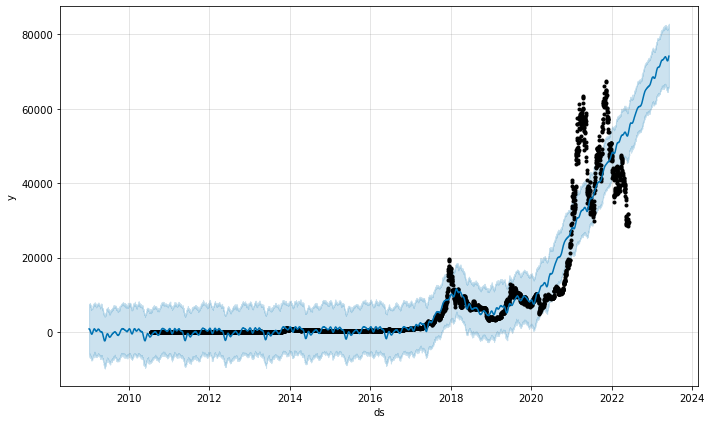

In [11]:
m = Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)

Very low flexibility

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\Users\maxba\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\maxba\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\maxba\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



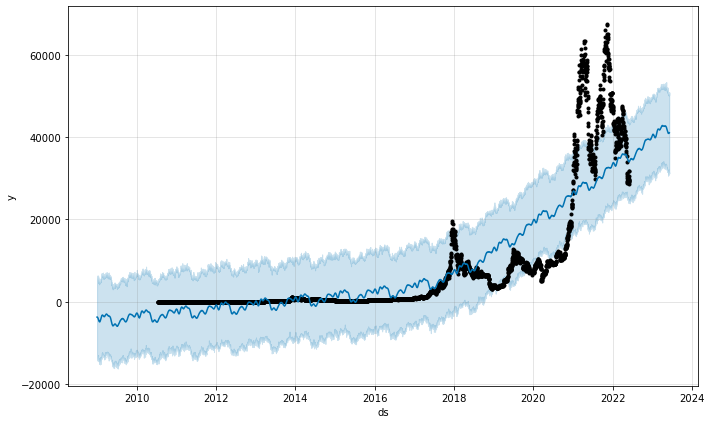

In [12]:
m = Prophet(changepoint_prior_scale=0.001)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)

Plotting on a specific time period

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\Users\maxba\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\maxba\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\maxba\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



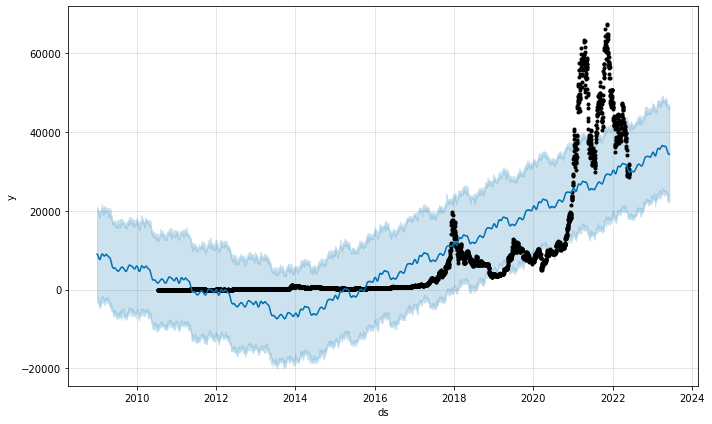

In [13]:
m = Prophet(changepoints=['2014-01-01'])
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)